# Analytical functions

This notebook simply shows off some analytical functions available in this package and that can be used for benchmarking.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

from pbnn.utils.analytical_functions import (
    barber_fn,
    gramacy_function,
    trigonometric_function,
)

%load_ext watermark

Text(0.5, 1.0, 'gramacy_function')

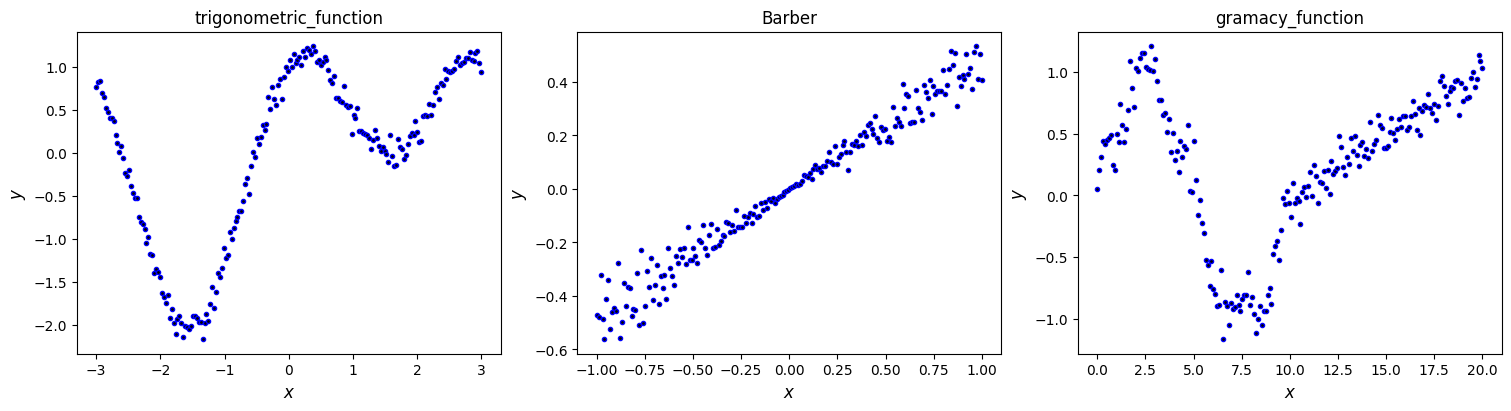

In [10]:
fig = plt.figure(constrained_layout=True, figsize=(3 * 5, 1 * 4))
gs = GridSpec(nrows=1, ncols=3, figure=fig)

# test function 1
x = np.linspace(-3, 3, 200)[:, None]
noise_level = 0.1
noise = noise_level * np.random.randn(*x.shape)
f, y = trigonometric_function(x, noise)
ax = fig.add_subplot(gs[0])
ax.plot(x, y, ls="", color="k", marker=".", markeredgecolor="b", markeredgewidth=1)
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)
ax.set_title("trigonometric_function", fontsize=12)

# test function 2
x = np.linspace(-1, 1, 200)[:, None]
noise_level = 0.1
noise = noise_level * np.random.randn(len(x), 1)
f, y = barber_fn(x, noise)
ax = fig.add_subplot(gs[1])
ax.plot(x, y, ls="", color="k", marker=".", markeredgecolor="b", markeredgewidth=1)
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)
ax.set_title("Barber", fontsize=12)

# test function 2
x = np.linspace(0, 20, 200)[:, None]
noise_level = 0.1
noise = noise_level * np.random.randn(len(x), 1)
f, y = gramacy_function(x, noise)
ax = fig.add_subplot(gs[2])
ax.plot(x, y, ls="", color="k", marker=".", markeredgecolor="b", markeredgewidth=1)
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)
ax.set_title("gramacy_function", fontsize=12)

In [11]:
%reload_ext watermark
%watermark -n -u -v -iv -w -a 'Brian Staber'

Author: Brian Staber

Last updated: Sun Aug 31 2025

Python implementation: CPython
Python version       : 3.12.9
IPython version      : 9.0.2

pbnn      : 0.1.0
numpy     : 2.2.4
matplotlib: 3.10.1

Watermark: 2.5.0

